In [6]:
import pandas as pd
import numpy as np
import torch
from torch import optim as optim
from torch import nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [7]:
from tqdm import tqdm 
import torchvision
import torchvision.transforms as transforms
import random
np.random.seed(0)
torch.manual_seed(0)
random.seed(0)

In [4]:
transform = transforms.ToTensor()

training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

training_loader = torch.utils.data.DataLoader(training_set, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

100%|██████████| 26421880/26421880 [00:13<00:00, 2022003.01it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 653295.28it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3366543.86it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11340481.61it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



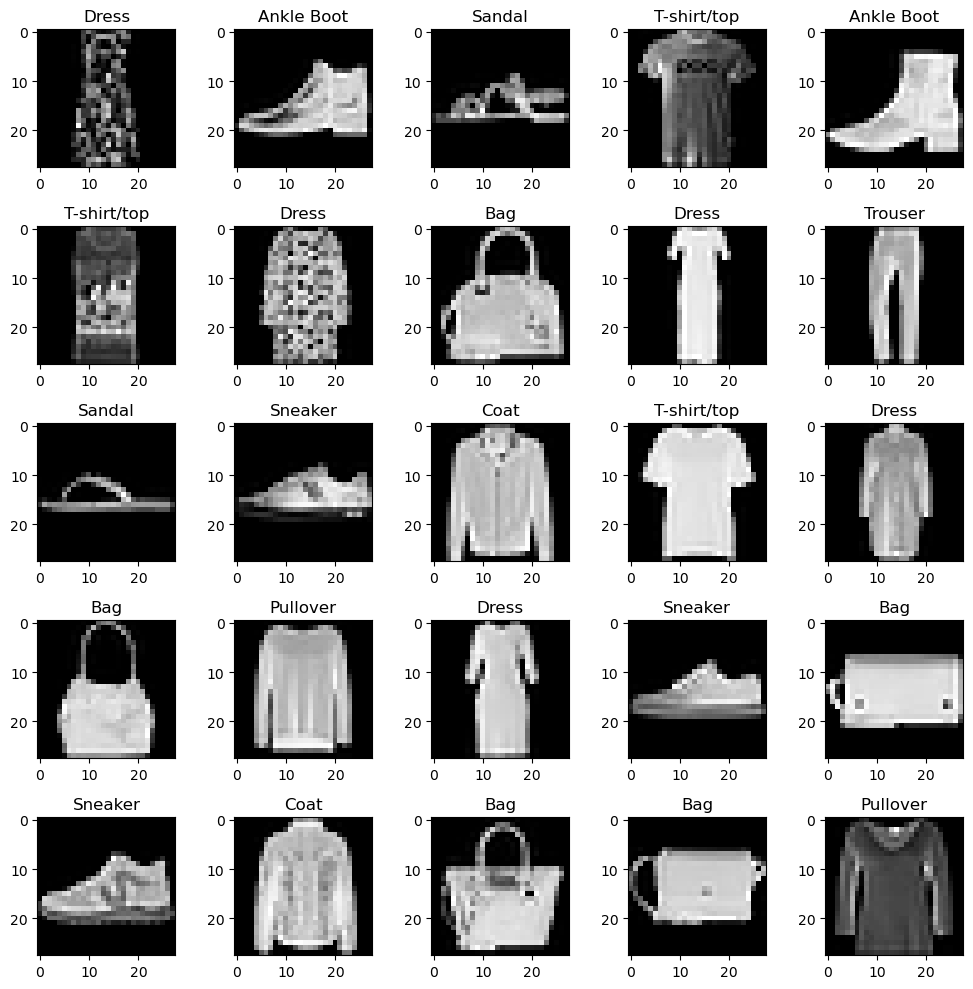

In [5]:
batch = next(iter(training_loader))
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(*batch)):
    if i > 24:
        break
    plt.subplot(5, 5, i + 1)
    plt.imshow(image[0], cmap="gray")
    plt.title(classes[label])

plt.tight_layout()

# Model

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, input_shape, hidden_dim, output_shape):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(input_shape, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_shape)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.output(x)
        return x

# Loss

# Optimizer

In [8]:
def train_one_epoch(model, optimizer, X, Y, BS=100):
    indices = np.random.permutation(len(X))
    losses = []
    for i, batch_start in enumerate(range(0, len(X), BS)):
        optimizer.zero_grad()
        x = X[indices[batch_start:batch_start+BS]]
        y = Y[indices[batch_start:batch_start+BS]]
        y_pred = model(x)
        
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
    return losses

In [9]:
def model_train(model, optimizer, X, Y, no_epochs=1000, loss_fn=loss_fn):
    epochs = []
    losses = []
    for ep in range(no_epochs):
        epochs.append(ep)
        loss = train_one_epoch(model, optimizer, X[:, None], Y[:, None])
        losses.extend(loss)
        if ep % 100 == 0:
            loss = loss_fn(model(X), Y)
            print(f"epoch {ep}: loss={loss.item():.3f}")

    plt.figure(figsize=(14,8))
    plt.plot(epochs, losses, label='losses')
    plt.legend()
    plt.show()
    return model

epoch 0: loss=1370.999
epoch 100: loss=550.468
epoch 200: loss=425.830
epoch 300: loss=396.407
epoch 400: loss=389.168
epoch 500: loss=387.382
epoch 600: loss=386.941
epoch 700: loss=386.832
epoch 800: loss=386.805
epoch 900: loss=386.799


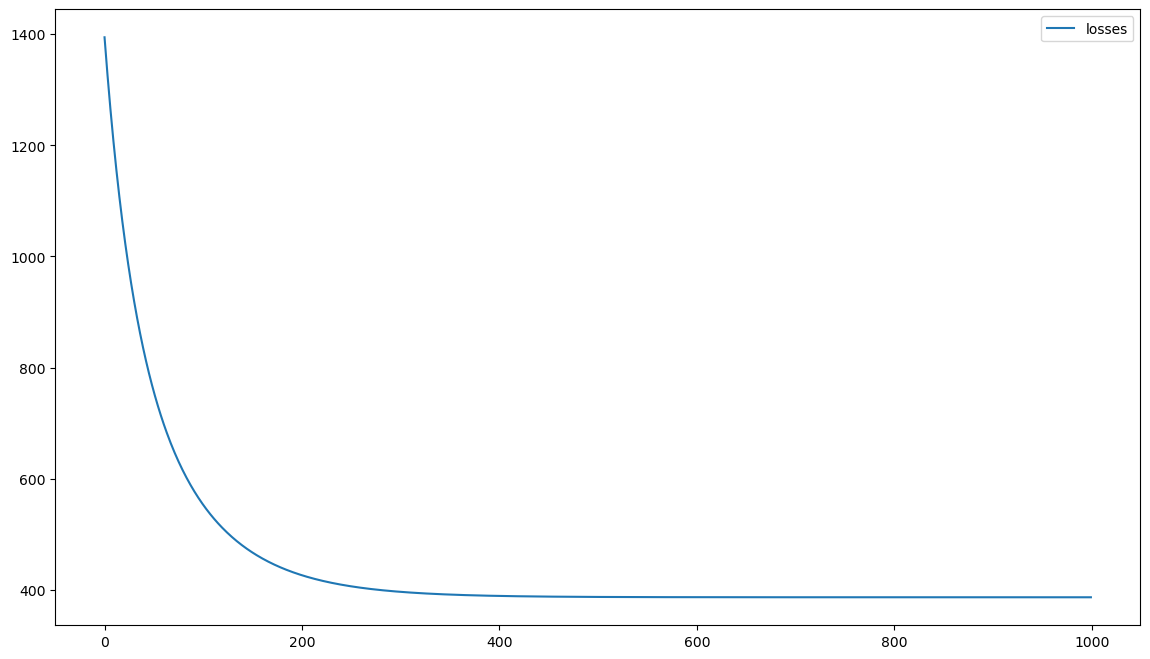

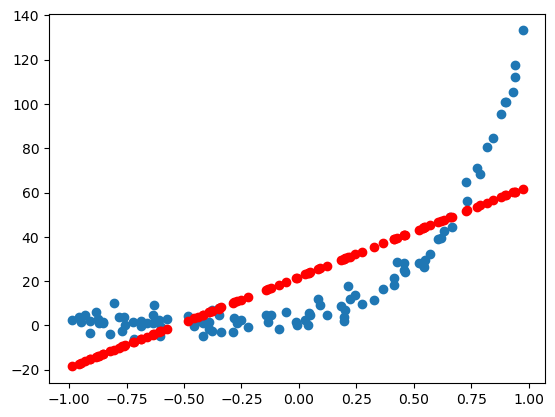

In [10]:
line_model = model_train(model, optimizer, X, Y)
with torch.no_grad():   
    y_pred = line_model(X)
    plt.scatter(df['x'], df['y'])
    plt.scatter(df['x'], y_pred, color='red')
    plt.show()

# Model

# Model

In [57]:
X = torch.tensor(df["x"])[:, None].float()
Y = torch.tensor(df["y"])[:, None].float()

In [ ]:
MLP_model = model_train(model, optimizer, X, Y, 2000)
with torch.no_grad():
    y_pred = MLP_model(X)
    plt.scatter(df['x'], df['y'])
    plt.scatter(df['x'], y_pred, color='red')
    plt.show()